<a href="https://colab.research.google.com/github/Ka275578/Adult_census_income/blob/main/Adult_census_income_final_commit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:- Kumar Anand

E-mail:- Ka275578@gmail.com

Problem statement:- The objective is to predict whether an individual's income exceeds $50,000 per year based on census data. This is a traditional supervised learning classifucation problem.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
#reading dataset (from github repository)
df= pd.read_csv('https://raw.githubusercontent.com/Ka275578/Adult_census_income/main/adult.csv')


In [3]:
#checking the view of data
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
#checking the Description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [5]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.shape

(32561, 15)

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

So we can see there are no null values in our dataset, but there are some values given as '?' which we can consider as missing values

In [8]:
#columns of the dataset
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

## Data Cleaning

In [9]:
#Replacing missing values,'?' with the mode
for column in df.columns:
  #finding mode of a particular column
  mod =df[column].mode()[0]
  #replacing missing or irrelevant values with the mode
  df[column] = df[column].replace(['?'],mod)

In [10]:
#checking df after replacing values
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Missing valuse has been replaced

In [11]:
#Dropping unwanted columns which is not relevant for training model and has many outliers
df.drop(['relationship','capital.gain','capital.loss'],axis=1,inplace=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,race,sex,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,White,Female,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,White,Female,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Black,Female,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,White,Female,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,White,Female,40,United-States,<=50K


# Data vizualization


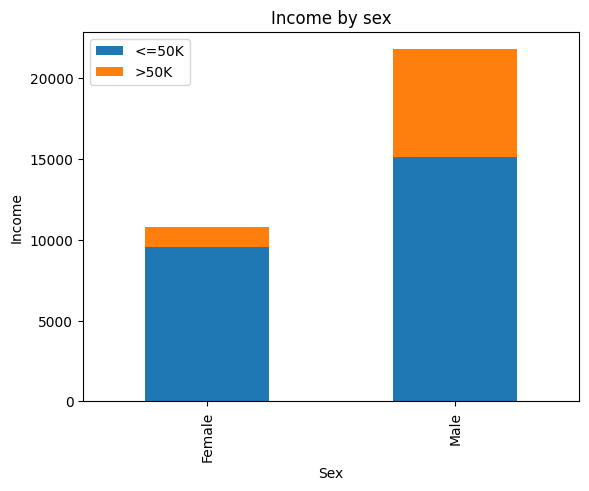

In [12]:
#Plotting income categorised by sex
grouped_data = df.groupby(['sex','income'])['income'].count().unstack()
#setting axis
ax= grouped_data.plot(kind='bar', stacked = 'True')
#setting labels
ax.set_xlabel('Sex')
ax.set_ylabel('Income')
ax.set_title('Income by sex')
ax.legend(['<=50K', '>50K'], loc='upper left')
plt.show()

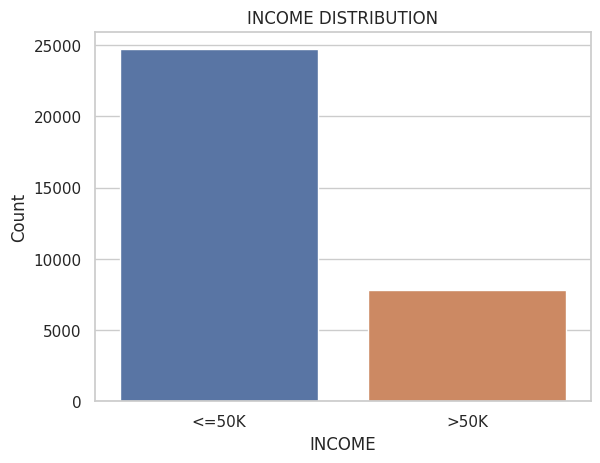

In [13]:
#Creating countplot of income
sns.set(style='whitegrid')
sns.countplot(x='income', data =df)
plt.xlabel('INCOME')
plt.ylabel('Count')
plt.title('INCOME DISTRIBUTION')
plt.show()

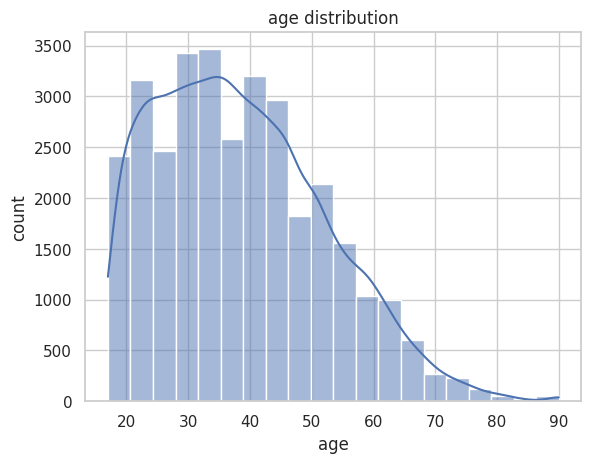

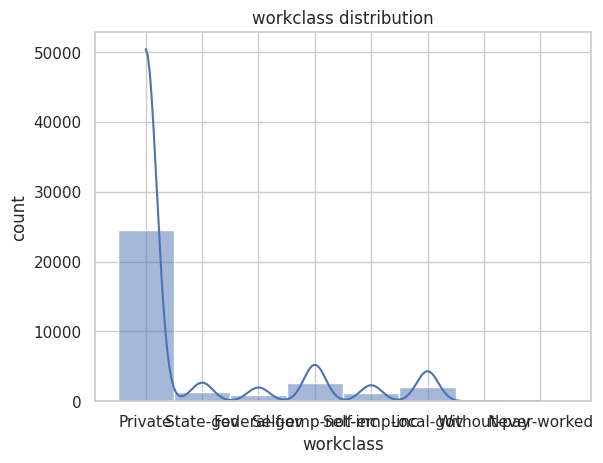

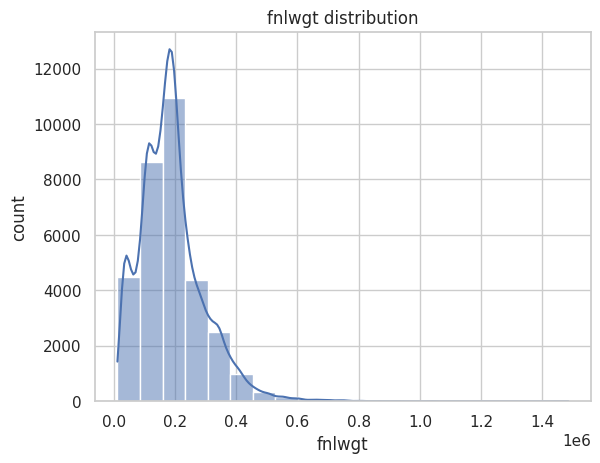

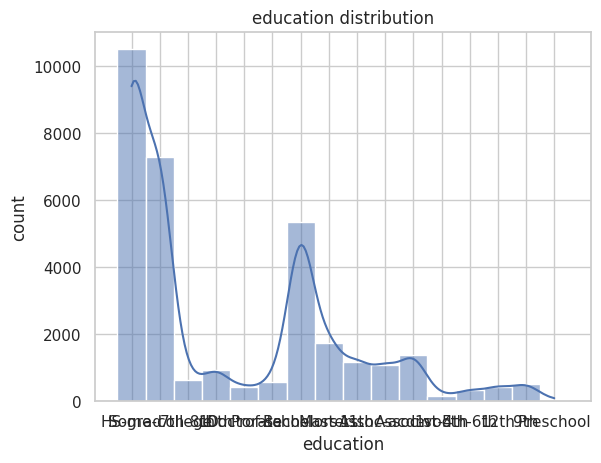

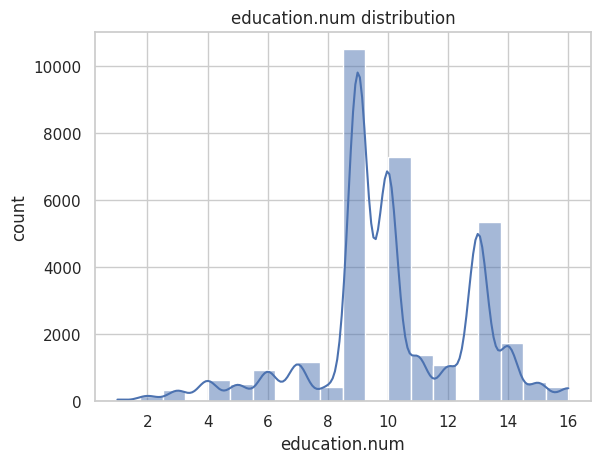

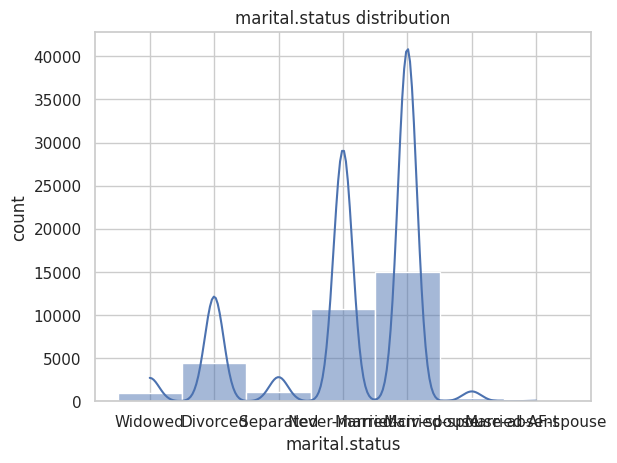

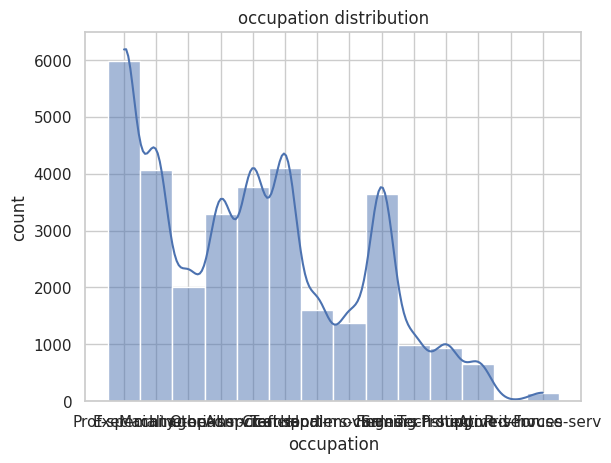

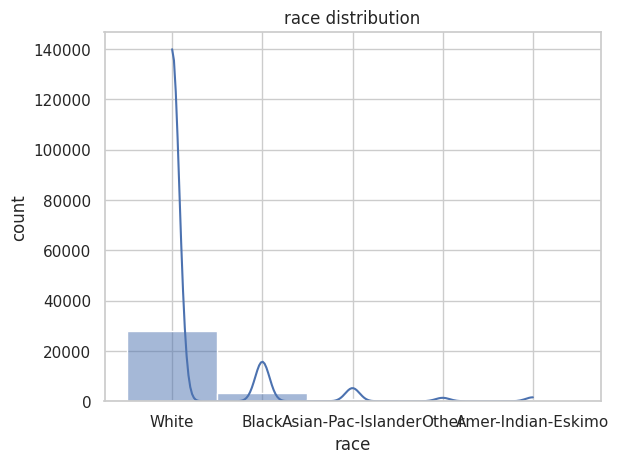

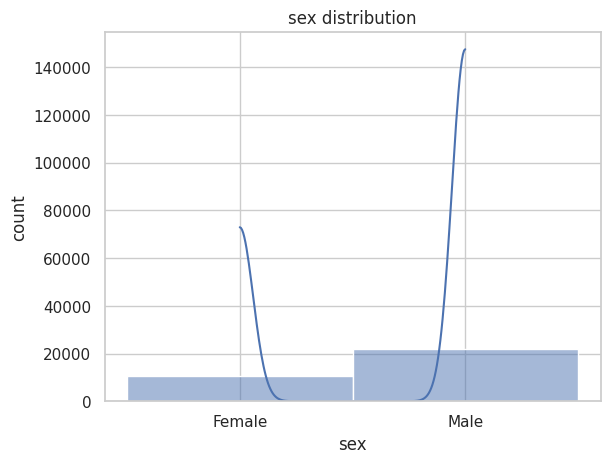

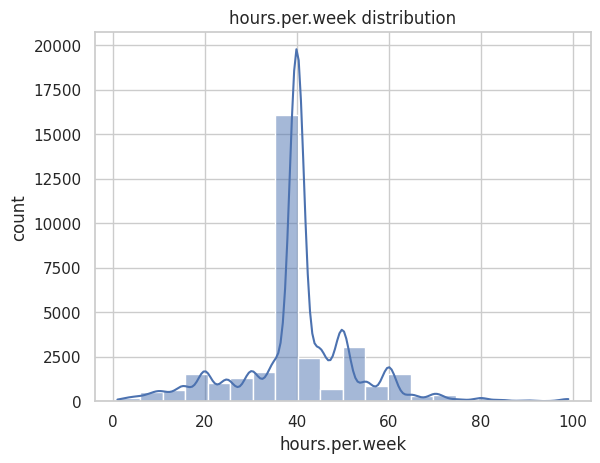

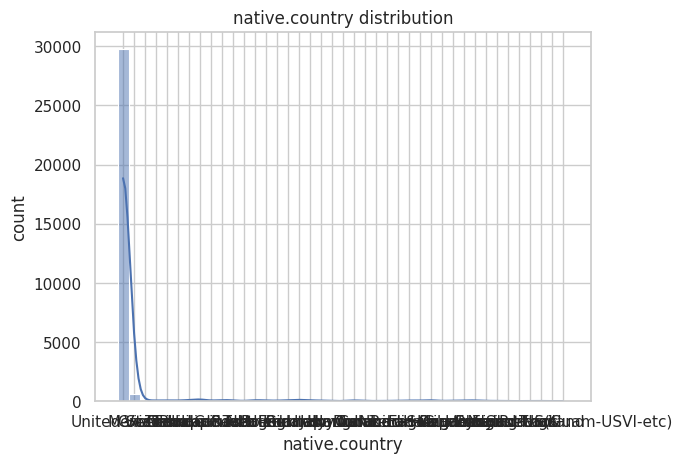

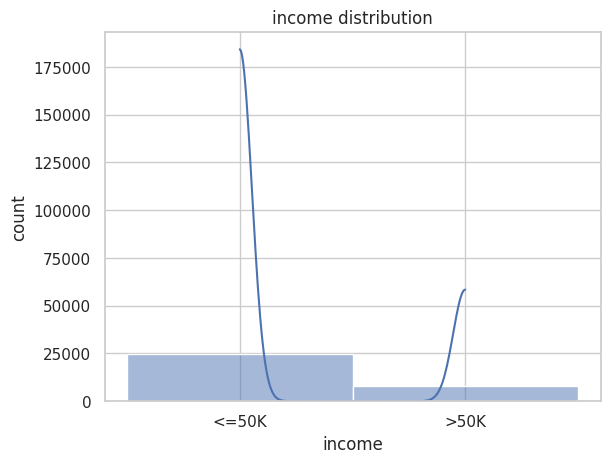

In [14]:
# Plotting all columns as histogram
for i in df.columns:
  sns.histplot(x=i, data=df, kde =True, bins=20)
  plt.xlabel(i)
  plt.title(f'{i} distribution')
  plt.ylabel('count')
  plt.show()


10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5355
Doctorate         413
HS-grad         10501
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
Name: education, dtype: int64


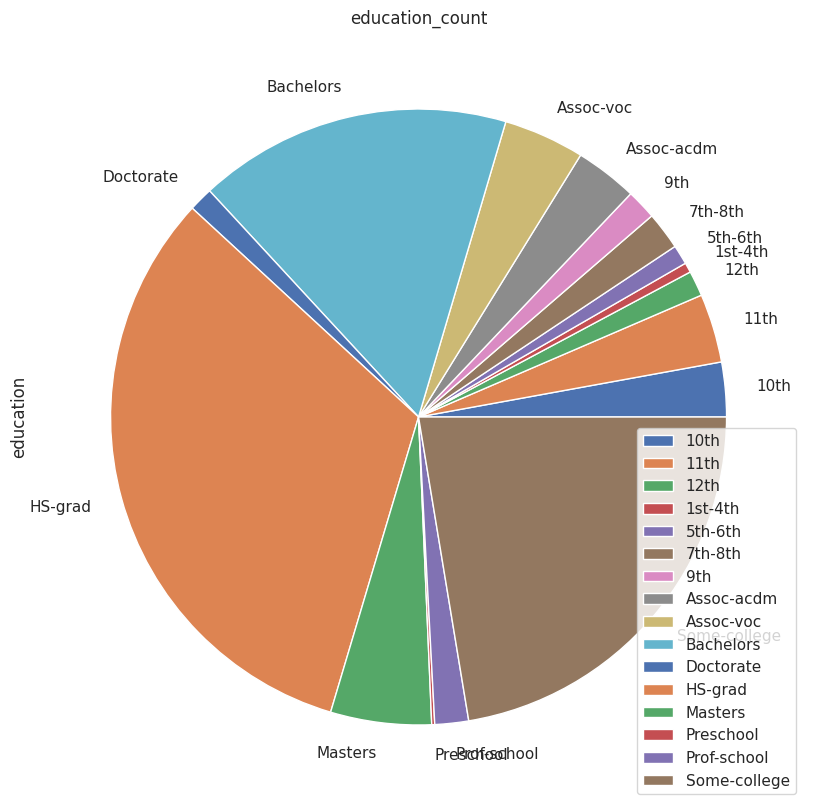

In [15]:
#Plotting pie chart for education qualifications
counts =df['education'].value_counts().sort_index()
print(counts)
counts.plot(kind='pie',title='education_count', figsize=(11,10))
plt.legend()
plt.show()

There are more number of people with HS-grad and lower number of people with preschool

In [16]:
#Encoding the income values
df['income']=df['income'].apply(lambda x: 0 if x=='<=50K' else 1 )
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,race,sex,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,White,Female,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,White,Female,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Black,Female,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,White,Female,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,White,Female,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,White,Male,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,Female,40,United-States,0


Text(0.5, 1.0, 'CORRELATION MATRIX')

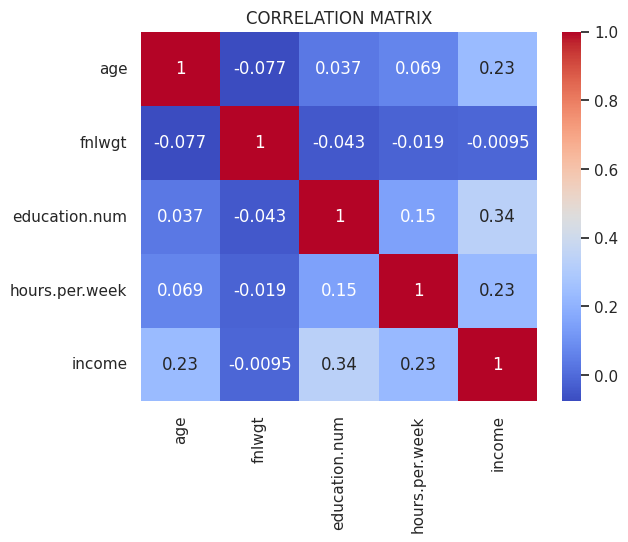

In [17]:
#Plotting of heatmap to find the correlation
data=df.select_dtypes(include ='number')
data=data.corr()
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.title("CORRELATION MATRIX")

According to the results of the correlation analysis, there is no strong relationship between the variables.

# Finding outliers using BoxPlot

<Axes: >

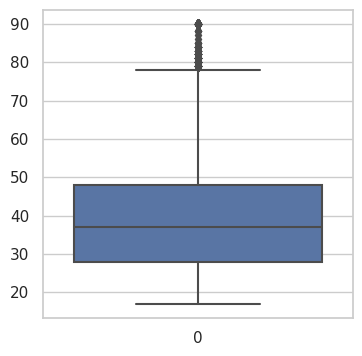

In [18]:
#Checking outliers in age column
plt.figure(figsize=(4,4))
sns.boxplot(data=df.age)

According to this boxplot, there are many outliers larger than the upper limit in the age column. By increasing the whisker, we can include some of these outliers in the analysis.

<Axes: >

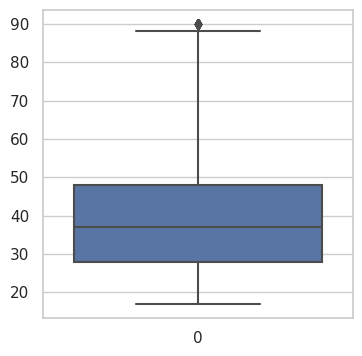

In [19]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df.age, whis=2) # When whisker is increased, the number of outliers decreases

 When we changed Whisker to 2, the number of the outliers decreased to 1.

Let's take a look to "hours.per.week"

<Axes: >

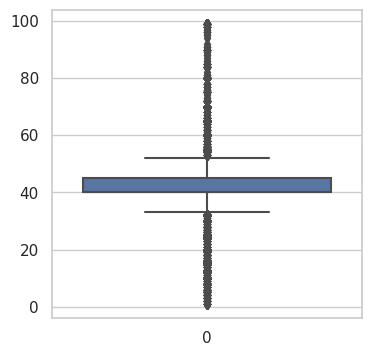

In [20]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df["hours.per.week"])

According to this boxplot, there are many outliers larger than the upper limit and lower limit in the "hours.per.week" column. By increasing the whisker, we can include some of these outliers in the analysis.

<Axes: >

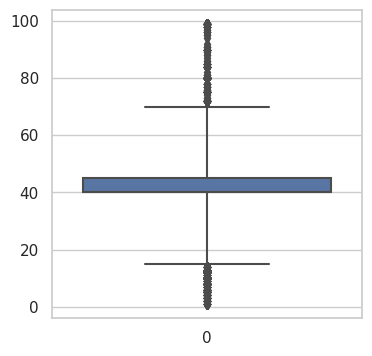

In [21]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df["hours.per.week"], whis=5)

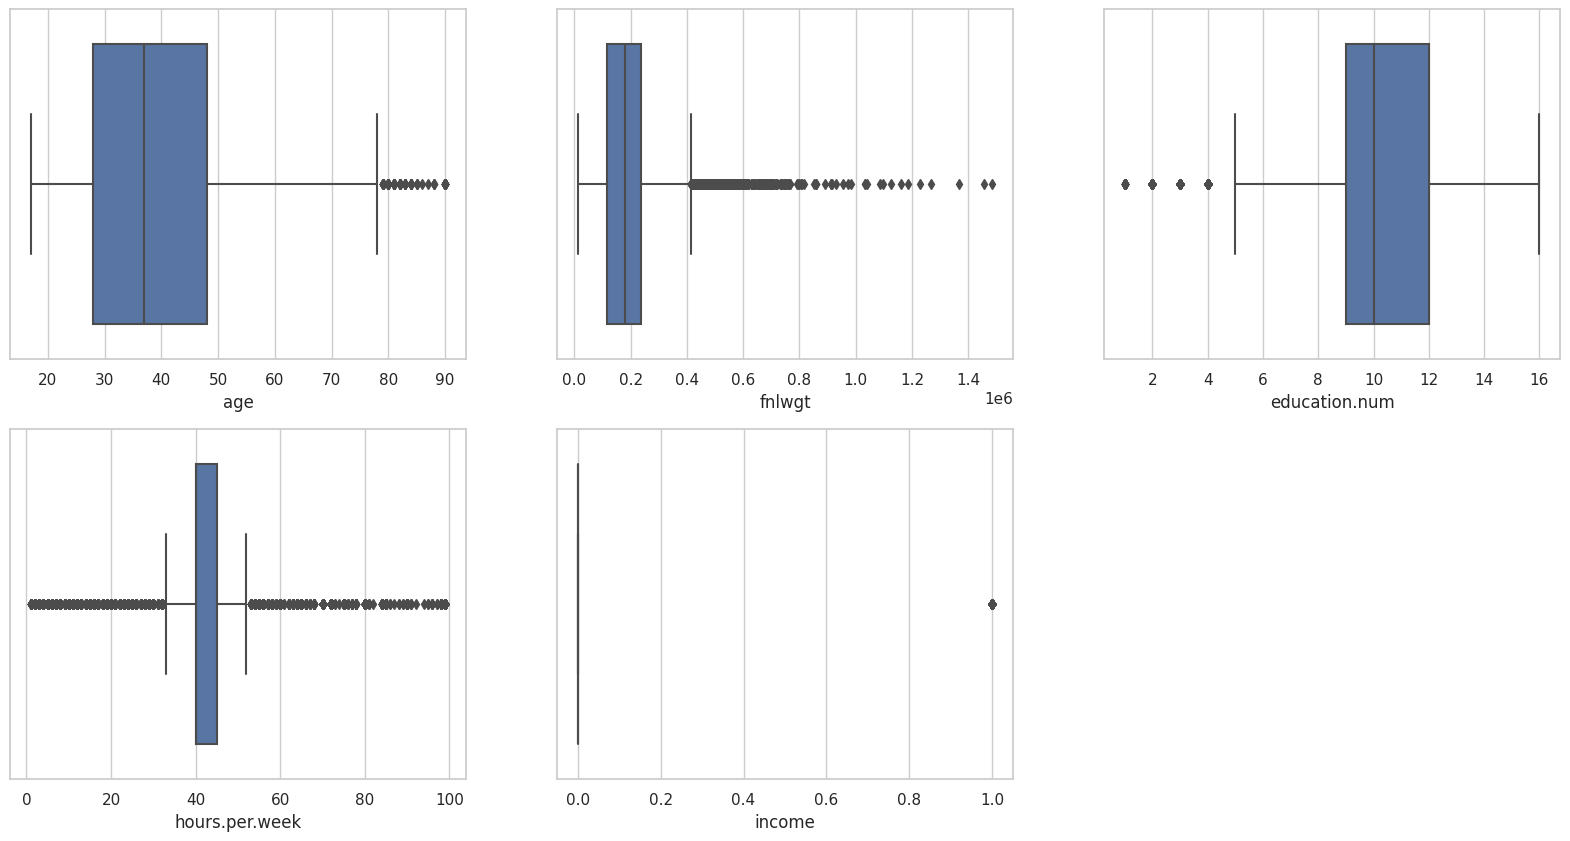

In [22]:
#Plotting BOXPLOT fro all the numerical features in dataset
plt.figure(figsize=(20,10))
index=0
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.subplot(2,3,index)
    sns.boxplot(x=feature,data=df,whis=1.5)

There are outliers in "age", "fnlwgt"and "hours.per.week" series.

In [23]:
#Column 'fnlwgt' is not relevant for traing the model
df = df.drop('fnlwgt',axis=1)

# Preparing data for model building

In [24]:
obj=[]
for i in df.columns:
  if df[i].dtype=='object':
    obj.append(i)


In [25]:
obj

['workclass',
 'education',
 'marital.status',
 'occupation',
 'race',
 'sex',
 'native.country']

Above variables are those variables which model will use to predict the data (or x-variables) and income will be our target variable since we want to predict that

In [26]:
#Dividing into X and Y
y=df['income']
x= df.drop(['income'], axis =1)

In [27]:
#Encoding the categorical data
encoder= OrdinalEncoder()
for i in obj:
  x[i]=encoder.fit_transform(np.array(x[i]).reshape(-1,1))


In [28]:
#Dividing the data into Train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 0)

Feature scaling

In [29]:
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)

 LOGISTIC REGRESSION

In [30]:
#Applying Logistic Regression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred = classifier_lr.predict(X_test)

In [32]:
cm =confusion_matrix(y_pred, y_test)
print(cm)
accuracy_score(y_test,y_pred)

[[5752 1188]
 [ 441  760]]


0.799901731973959

We can see that from confusion matrix 'TP'=5752, 'FN'=441, 'FP'=1188, 'TN'=760, acuuracy is equivalent to 80%

RANDOM FOREST

In [33]:
classifier_rf= RandomForestClassifier()
classifier_rf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_pred =classifier_rf.predict(X_test)

In [35]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_test,y_pred)

[[5608  872]
 [ 585 1076]]


0.8210293575727797

We can see that from confusion matrix 'TP'=5607, 'FN'=586, 'FP'=893, 'TN'=1055, acuuracy is equivalent to 82%, so Random forest accuracy is more than logistic regression

####CONCLUSION

* *We have predicted the income class for individuals*
* *We saw some missing values given in the form of '?'*
* *We have removed some unnecessary columns not relevant for model training and contained outliers*
* *We converted 'income' into numerical feature*
* *We have used two supervised ML algoruthm i.e LOGISTIC REGRESSION and RANDOM FOREST CLASSIFIER*
* *Random forest has more accuracy than logistic regression*
